# Decision Trees 

Decision tree is the most powerful and popular tool for classification and prediction. A Decision tree is a flowchart like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label.

Decision tree is a type of supervised learning algorithm that is mostly used in classification problems. It works for both categorical and continuous input and output variables. In this technique, we split the population or sample into two or more homogeneous sets based on most importent input variables.

Here i am using the dataset : **10_bank.csv**

It is a csv file containg information regarding custermer detailes of a bank. The target column conatains binery values 0 and 1 for **defaulters** and **non-defaulters**. Descriptive statistics of the data will be provided below. 

Here i am creating a decision tree for the given data based on the dataset featues by setting the target column as standard. 

In [0]:
import io                   # importing io library for reading uploaded file.
import pandas as pd         # importing pandas for dataframe creation and descriptive statistics.
from sklearn import tree    # import sklearn tree library for decision tree creation.

from google.colab import files    # uploading the file.
uploaded = files.upload()

Saving 10_bank.csv to 10_bank.csv


In [0]:
df = pd.read_csv(io.BytesIO(uploaded['10_bank.csv']))  # reading the file as dataframe.

In [0]:
print(df.head())      # return first five rows with column names.
print('\n')
print(df.describe())  # provide descriptive statistical data.
print('\n')
print(df.shape)       # return number of columns and rows in the data set.

   c_id  Target  Age  Gender  Occupation  No_OF_CR_TXNS  AGE_BKT
0     1       0   41       1           1             38        4
1     2       0   52       1           0             17        6
2     3       0   31       0           2              8        2
3     4       0   45       0           3             14        4
4     5       0   39       0           2              1        3


              c_id       Target  ...  No_OF_CR_TXNS      AGE_BKT
count  1050.000000  1050.000000  ...    1050.000000  1050.000000
mean    525.500000     0.073333  ...      17.047619     3.107619
std     303.253195     0.260807  ...      13.364995     1.900489
min       1.000000     0.000000  ...       0.000000     0.000000
25%     263.250000     0.000000  ...       7.000000     2.000000
50%     525.500000     0.000000  ...      14.000000     3.000000
75%     787.750000     0.000000  ...      24.000000     5.000000
max    1050.000000     1.000000  ...      50.000000     6.000000

[8 rows x 7 columns]



The data set is consists of 7 features and 1050 rows. Descriptive statistics of the data is given above.

In [0]:
print (df.dtypes)   # return data type of each column.

c_id              int64
Target            int64
Age               int64
Gender           object
Occupation       object
No_OF_CR_TXNS     int64
AGE_BKT          object
dtype: object


Here the columns - Gender, Occupation and AGE_BKT are categorical variables, inorder to use them in decision trees we need to convert them in to numerical values.

In [0]:
# process of data cleaning. 
print(pd.isna(df))  # return the empty fields, if any value is missing , the code will return true.
print(df.isnull().sum())  # checking for number of missing values in each column.

       c_id  Target    Age  Gender  Occupation  No_OF_CR_TXNS  AGE_BKT
0     False   False  False   False       False          False    False
1     False   False  False   False       False          False    False
2     False   False  False   False       False          False    False
3     False   False  False   False       False          False    False
4     False   False  False   False       False          False    False
...     ...     ...    ...     ...         ...            ...      ...
1045  False   False  False   False       False          False    False
1046  False   False  False   False       False          False    False
1047  False   False  False   False       False          False    False
1048  False   False  False   False       False          False    False
1049  False   False  False   False       False          False    False

[1050 rows x 7 columns]
c_id             0
Target           0
Age              0
Gender           0
Occupation       0
No_OF_CR_TXNS    0
AGE_BKT  

There is no missing values in the data set, The data set is clean and good to go.

In [0]:
# Finding out the unique values in each columns. In the next step we will convert those categorical values in to numerical representations.
print (df['Target'].unique())
print (df['Gender'].unique())
print (df['Occupation'].unique())
print (df['AGE_BKT'].unique())

[0 1]
['M' 'F' 'O']
['SELF-EMP' 'SAL' 'SENP' 'PROF']
['41-45' '>50' '31-35' '36-40' '26-30' '46-50' '<25']


In [0]:
# converting and mapping the categorical variables into corresponding numerical columns.
d = {'M': 1, 'F': 0, 'O':2}
df['Gender'] = df['Gender'].map(d)
d = {'SELF-EMP': 1, 'SAL': 0, 'SENP':2, 'PROF':3}
df['Occupation'] = df['Occupation'].map(d)
d = {'<25': 0, '26-30': 1, '31-35':2, '36-40':3, '41-45':4, '46-50':5, '>50':6}
df['AGE_BKT'] = df['AGE_BKT'].map(d)

scikit-learn needs everything to be numerical for decision trees to work. So, we'll map each categorical variables as shown above.

In [0]:
# checking and verifying the above performed operations.
print(df.head())
print (df.dtypes)

   c_id  Target  Age  Gender  Occupation  No_OF_CR_TXNS  AGE_BKT
0     1       0   41       1           1             38        4
1     2       0   52       1           0             17        6
2     3       0   31       0           2              8        2
3     4       0   45       0           3             14        4
4     5       0   39       0           2              1        3
c_id             int64
Target           int64
Age              int64
Gender           int64
Occupation       int64
No_OF_CR_TXNS    int64
AGE_BKT          int64
dtype: object


Now the Gender, Occupation and AGE_BKT are intiger values.

In [0]:
features = list(df.columns[2:]) # extractinting the column names nedded for preparing decision tress. ( all columns excluding first two columns).
features

['Age', 'Gender', 'Occupation', 'No_OF_CR_TXNS', 'AGE_BKT']

Here we separate the features from the target column that we're trying to bulid a decision tree for.

In [0]:
y = df["Target"] # assigning the target column for y
X = df[features] # assigning extracted features to X
clf = tree.DecisionTreeClassifier() # declaring the decision tree. 
clf = clf.fit(X,y) # fitting the decision tree.

Constructing the decision tree

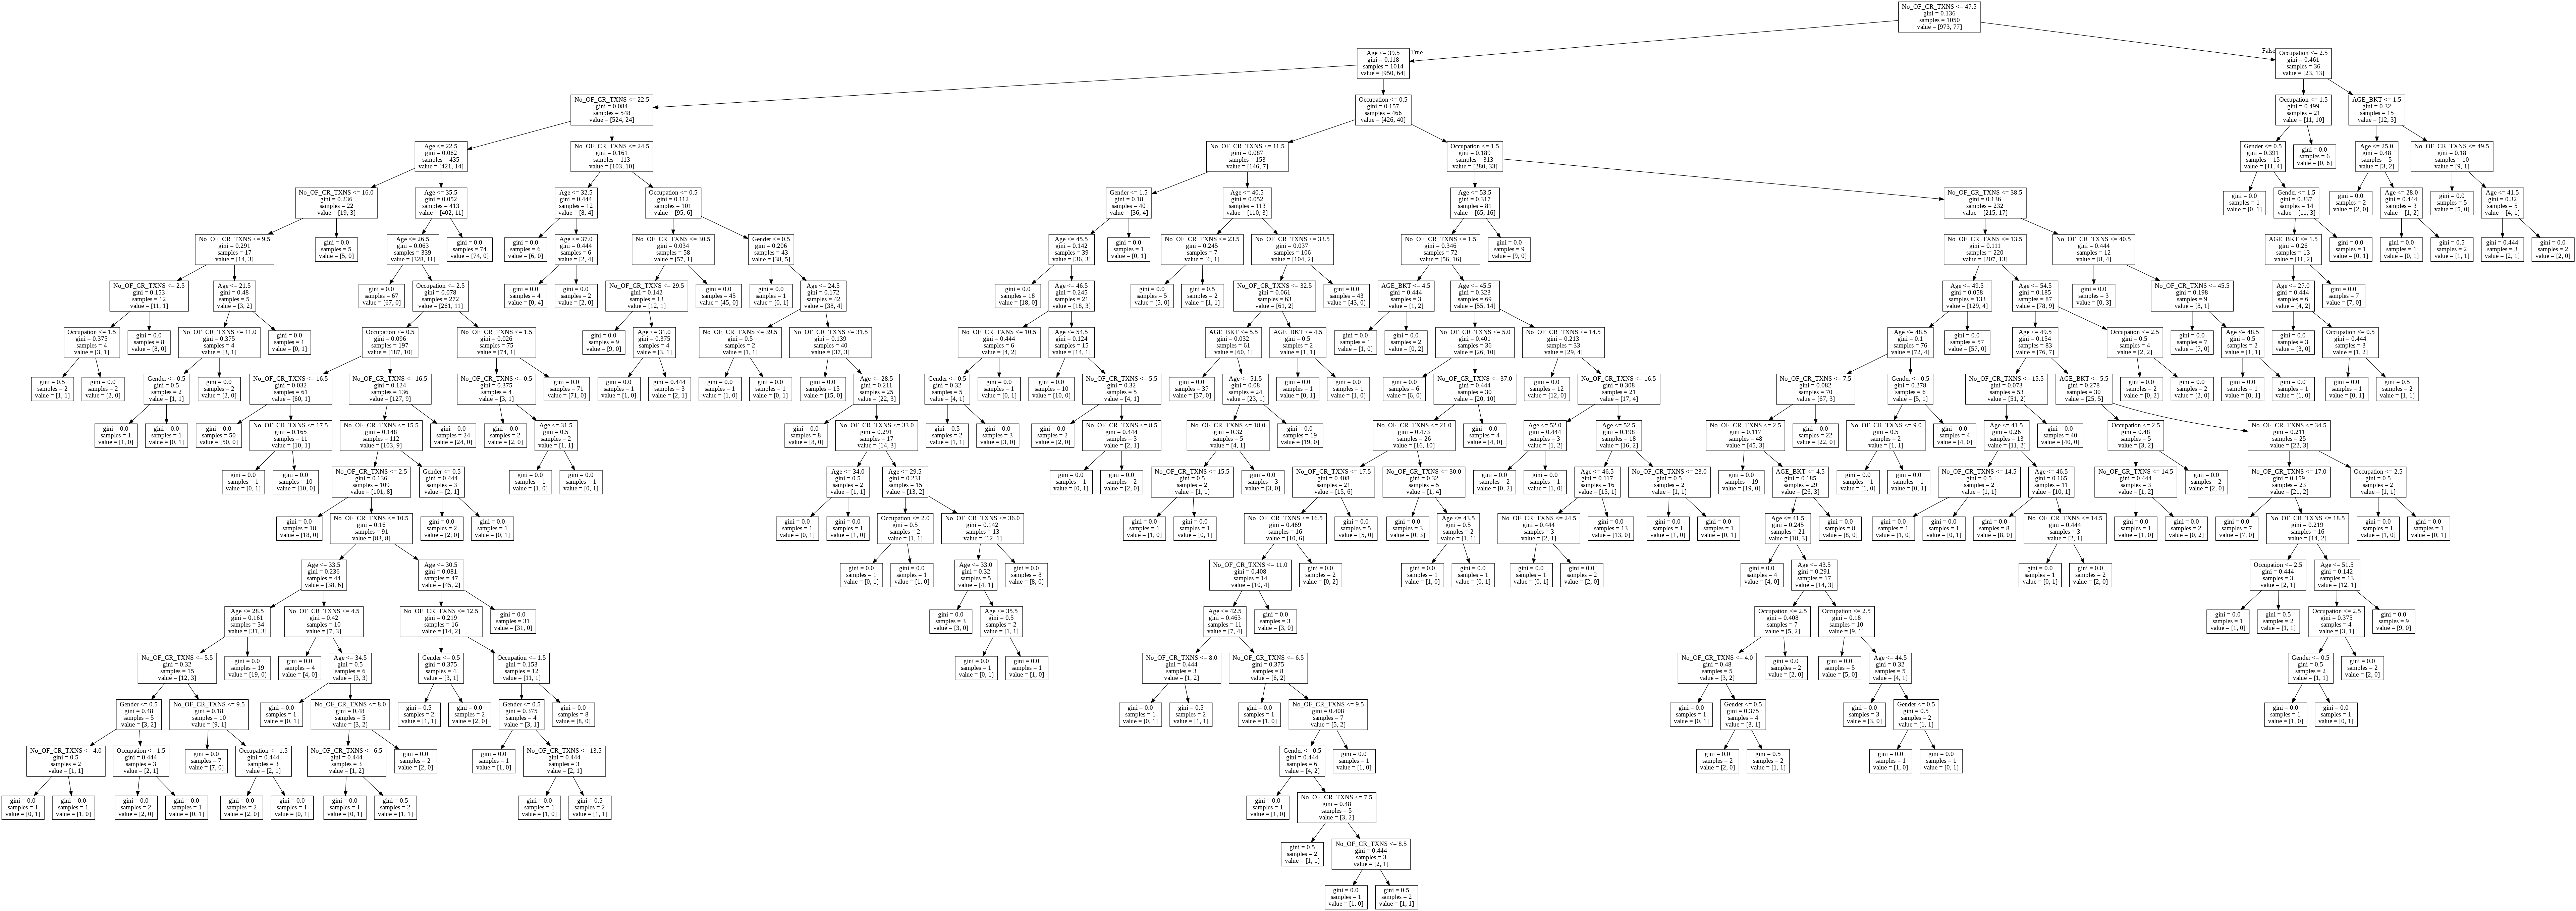

In [0]:
# ignoring the waring................................................
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Displaying the decision tree using graphviz and pydot and os.
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=features)  
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

Here in decision tree, each condition branches left for "true" and right for "false". When you end up at a value, the value array represents how many samples exist in each target value. So value = [0. 5.] mean there are 0 "defaulters" and 5 "non-defaulters" by the tim we get to that point. Value = [3. 0.] means 3 defaulterss and 0 non-defaulters.

In [0]:
# We'll use a random forest of 10 decision trees to predict employment of specific customer profiles:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X, y)

# Cases of Predicting the loan saction of customers.
print(clf.predict([[41, 1, 1, 38, 4]]))
print(clf.predict([[40, 0, 1, 40, 3]]))

[0]
[1]


**To improve the accuracy of the model we could use the prunning technique.**